A lot of computational algorithms are expressed using Linear Algebra terminology - vectors and matrices. This is thanks to the wide range of methods within Linear Algebra for solving the sort of problems that computers are good at solving!

Within python, our first thought may be to represent a vector as a list. But there is a downside: lists do not *naturally* behave as vectors. For example:

In [1]:
x = [1, 2, 3]
y = [4, 9, 16]
print(x+y)

[1, 2, 3, 4, 9, 16]


Similarly, we cannot apply algebraic operations or functions to lists in a straightforward manner that matches our expectations.

However, there is a python package - `numpy` - that does give us the behaviour we want.

# numpy

In [2]:
import numpy

`numpy` is used so frequently that in a lot of cases and online explanations you will see it abbreviated, using `import numpy as np`. Here we try to avoid that - auto-completion inside spyder means that the additional typing is trivial, and using the full name is clearer.

`numpy` defines a special type, an `array`, which can represent vectors, matrices, and other higher-rank objects. Unlike standard python lists, an `array` can only contain objects of a single type. The notation to create these objects is straightforward: one easy way is to start with a list:

In [3]:
x_numpy = numpy.array(x)
y_numpy = numpy.array(y)
print(x_numpy + y_numpy)
print(x_numpy[0])
print(y_numpy[1:])

[ 5 11 19]
1
[ 9 16]


We see that the `array` objects behave as we would expect, and accessing elements is exactly the same as for a list. We can also perform other mathematical operations on the *whole vector*:

In [4]:
print(3*x_numpy)
print(numpy.log(x_numpy))
print(x_numpy*y_numpy)
print((x_numpy-1)**2)

[3 6 9]
[ 0.          0.69314718  1.09861229]
[ 4 18 48]
[0 1 4]


Think about these carefully. 

1. The first case is straightforward: all elements of the vector are multiplied by a constant. 
2. The second case applies a function to each element separately. `numpy` implements a version of most interesting mathematical functions, which are applied directly to each element.
3. The third case is *elementwise* multiplication of the vectors. The first component of the answer is the product of the first component of `x_numpy` with the first component of `y_numpy`. The second component of the answer is the product of the second component of `x_numpy` with the second component of `y_numpy`. We cannot use the `*` operator to represent matrix multiplication, but must use a function (see below; note that there will be an operator in python `3.5+`, but using it will mean your code is, for now, not widely useable).
4. The fourth case shows a combination of cases above. The answer is given by elementwise subtraction of 1, then squaring (elementwise) that result.

Defining a matrix can be done by applying the `array` function to a list of lists:

In [5]:
A_numpy = numpy.array([ [1, 2, 3], [4, 5, 6], [7, 8, 0]])
print(A_numpy**2)

[[ 1  4  9]
 [16 25 36]
 [49 64  0]]


We see that for higher rank objects such as matrices, the operations are still performed *elementwise*.

To multiply a matrix by a vector, or a vector by a vector, in the standard linear algebra sense, we use the `numpy.dot` function:

In [6]:
x_squared = numpy.dot(x_numpy, x_numpy)
A_times_x = numpy.dot(A_numpy, x_numpy)
print(x_squared)
print(A_times_x)

14
[14 32 23]


Note that we have appeared to multiply a matrix by a row vector, and get a row vector back. This is because `numpy` does not distinguish between row and column vectors, so everything appears as a row vector. (You could define a $n \times 1$ `array` instead, but there is no advantage).

To actually check the *shape* and *size* of `numpy` arrays, you can directly check their attributes:

In [7]:
print(x_numpy.size)
print(x_numpy.shape)
print(A_numpy.size)
print(A_numpy.shape)

3
(3,)
9
(3, 3)


`numpy` contains a number of very efficient functions for working with arrays, for finding extreme values, and performing linear algebra tasks. Particular functions that are worth knowing, or starting from, are

* `arange`: constructs an array containing increasing integers
* `linspace`: constructs a linearly spaced array
* `zeros` and `ones`: constructs arrays containing just ones or zeros
* `diag`: extracts the diagonal of a matrix, or build a matrix with just diagonal entries
* `mgrid`: constructs matrices from vectors for 3d plots
* `random.rand`: constructs an array of random numbers.

## Linear algebra

`numpy` also defines a number of linear algebra functions. However, a more comprehensive set of functions, which is better maintained and often more efficient, is given by `scipy`:

In [8]:
from scipy import linalg

In [9]:
print(linalg.solve(A_numpy, x_numpy))
print(linalg.det(A_numpy))

[-0.33333333  0.66666667  0.        ]
27.0


In addition to solving linear systems and computing determinants, you can also factorize matrices and generally do most linear algebra operations that you need. The [scipy documentation](http://docs.scipy.org/doc/scipy/reference/) is comprehensive, and has a [specific section on Linear Algebra](http://docs.scipy.org/doc/scipy/reference/linalg.html), as well as a [section in the tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html). Johansson [also has a tutorial on scipy in general](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-3-Scipy.ipynb).

## Working with files

Often we will want to work with data - constants, parameters, initial conditions, measurements, and so on. `numpy` provides ways to work with data stored in files - either reading them in or writing them out. A list of "[File I/O routines](http://docs.scipy.org/doc/numpy/reference/routines.io.html)" is available, but the two key routines are [`loadtxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt) and [`savetxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html#numpy.savetxt).

As a simple example we take our matrix `A_numpy` above and save it to a file:

In [10]:
numpy.savetxt('A_numpy.txt', A_numpy)

We can then check the contents of that file (you should open the file on your machine to check):

In [11]:
!cat A_numpy.txt

1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00
4.000000000000000000e+00 5.000000000000000000e+00 6.000000000000000000e+00
7.000000000000000000e+00 8.000000000000000000e+00 0.000000000000000000e+00


Finally, we can read the contents of that file into a new variable and check that it matches:

In [12]:
A_from_file = numpy.loadtxt('A_numpy.txt')
print(A_from_file == A_numpy)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


# Plotting

There are many python plotting libraries depending on your purpose. However, the standard general-purpose library is `matplotlib`. This is often used through its `pyplot` interface.

This is a quick recap of the basic plotting commands, but using `numpy` as well.

In [13]:
from matplotlib import pyplot
%matplotlib inline

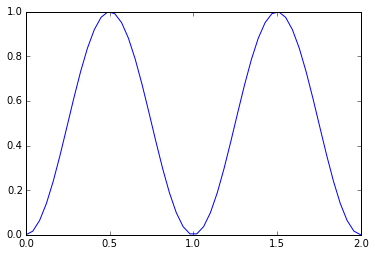

In [14]:
x = numpy.linspace(0, 2.0)
y = numpy.sin(numpy.pi*x)**2
pyplot.plot(x, y)
pyplot.show()

Note: the line `%matplotlib inline` is a special *IPython* command that makes the plot show up inline in the IPython console or notebook. It has no effect in a standard python script.

This plotting interface is straightforward, but the results are not particularly nice. The following commands illustrate some of the ways of improving the plot:

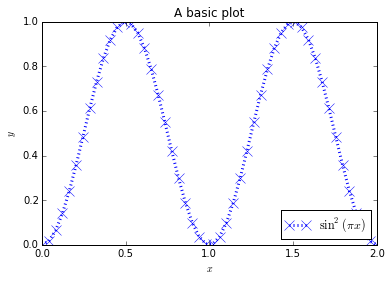

In [15]:
x = numpy.linspace(0, 2.0)
y = numpy.sin(numpy.pi*x)**2
pyplot.plot(x, y, marker='x', markersize=10, linestyle=':', linewidth=3, 
            color='b', label=r'$\sin^2(\pi x)$')
pyplot.legend(loc='lower right')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('A basic plot')
pyplot.show()

Whilst most of the commands are self-explanatory, a brief note should be made of the strings line `r'$x$'`. These strings are in LaTeX format, which is *the* standard typesetting method for professional-level mathematics. The `$` symbols surround mathematics. The `r` before the definition of the string says that the following string will be "raw": that backslash characters should be left alone. Then, special LaTeX commands have a backslash in front of them: here we use `\pi` and `\sin`. We can also use `^` to denote superscripts (used here), `_` to denote subscripts, and use `{}` to group terms.

By combining these basic commands with other plotting types (`semilogx` and `loglog`, for example), most simple plots can be produced quickly.

## Saving figures

If you want to save the figure to a file, instead of printing it to the screen, use the [`savefig`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig) command instead of the `show` command. For example, try:

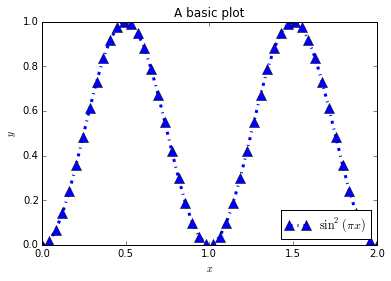

In [16]:
x = numpy.linspace(0, 2.0)
y = numpy.sin(numpy.pi*x)**2
pyplot.plot(x, y, marker='^', markersize=10, linestyle='-.', linewidth=3, 
            color='b', label=r'$\sin^2(\pi x)$')
pyplot.legend(loc='lower right')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('A basic plot')
pyplot.savefig('simple_plot.png')

We can then check the file on disk (you should open the file on your machine to check):

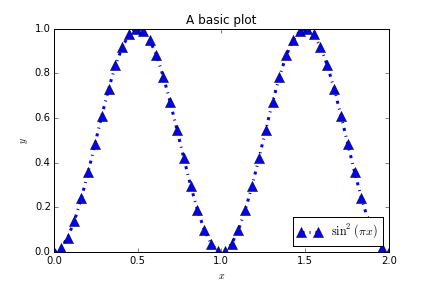

In [17]:
from IPython.display import Image
Image('simple_plot.png')

The type of the file is taken from the extension. Here we have used a `png` file, but `svg` and `pdf` output will also work.

## Object-based approach

To get a more detailed control over the plot it's better to look at the objects that `matplotlib` is producing. Remember, when we talked about classes we said that it is an object with attributes and methods (functions) that are accessed using dot notation. Here are steps to completely control the plot.

First we define a figure object. We will control its size (the units default to inches):

In [18]:
fig = pyplot.figure(figsize=(10, 6))

We will then define two axes on this figure. The numbers refers to the positions of the edges of the axes with respect to the figure window (between 0 and 1):

In [19]:
axis1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height
axis2 = fig.add_axes([0.4, 0.7, 0.2, 0.15])

We will then add data to the both axes:

In [20]:
axis1.plot(x, y)
axis2.plot(x, y)

We will then set the range of the second axis:

In [21]:
axis2.set_xbound(0.7, 0.8)
axis2.set_ybound(0.3, 0.7)

Finally, we'll see what it looks like:

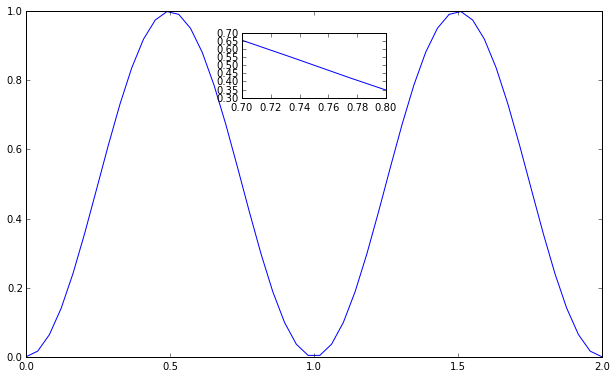

In [22]:
fig

Each axis contains additional objects that can be modified.

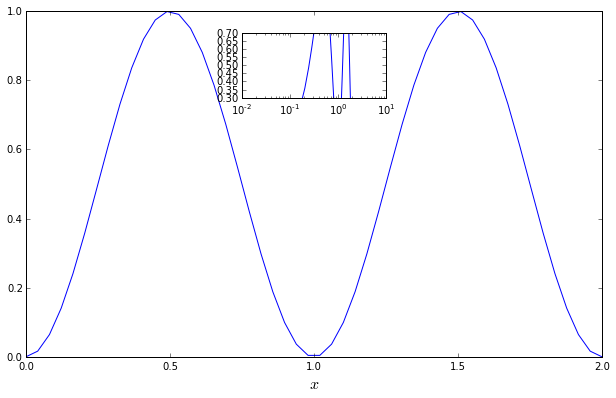

In [23]:
axis2.set_xscale('log')
axis1.set_xlabel(r'$x$', fontsize=16)
fig

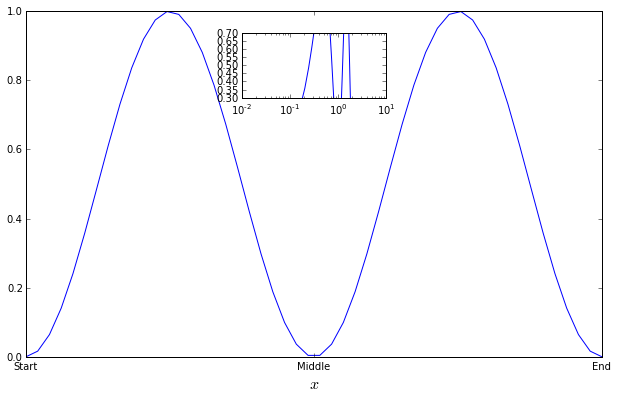

In [24]:
axis1.set_xticks([0, 1, 2])
axis1.set_xticklabels(['Start', 'Middle', 'End'])
fig

Adding multiple axes by hand is often annoying (although sometimes necessary). There are a number of tools that can be used to simplify this in standard cases: `add_subplot` is the standard one. When you want a figure containing multiple subplots all the same size, with `r` rows and `c` columns, the command is `add_subplot(r, c, <subplot_number>)`. For example:

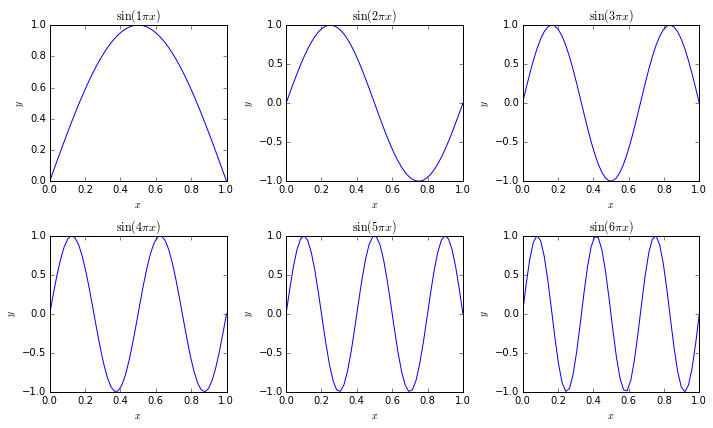

In [25]:
fig = pyplot.figure(figsize=(10, 6))
x = numpy.linspace(0.0, 1.0)
for subplot in range(1, 7):
    axis = fig.add_subplot(2, 3, subplot)
    axis.plot(x, numpy.sin(numpy.pi*x*subplot))
    axis.set_xlabel(r'$x$')
    axis.set_ylabel(r'$y$')
    axis.set_title(r'$\sin({} \pi x)$'.format(subplot))
fig.tight_layout();

The `tight_layout` function call at the end ensures that the axis labels and titles do not overlap with other subplots.

## Higher dimensions

To plot three-dimensional objects, we need to modify the *axis* so that it knows a third dimension is required. To do this, we import another module and modify the command that sets up the axis object.

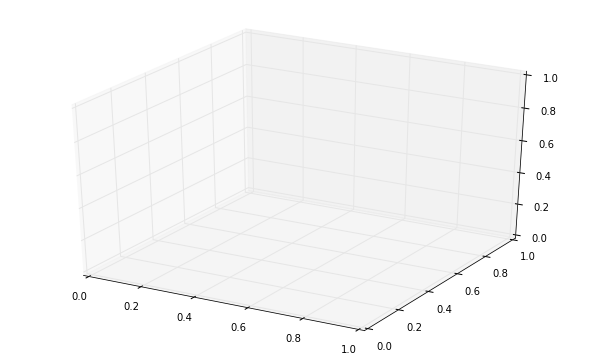

In [26]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = pyplot.figure(figsize=(10, 6))
axis = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d')

We can then construct, for example, a parametric spiral:

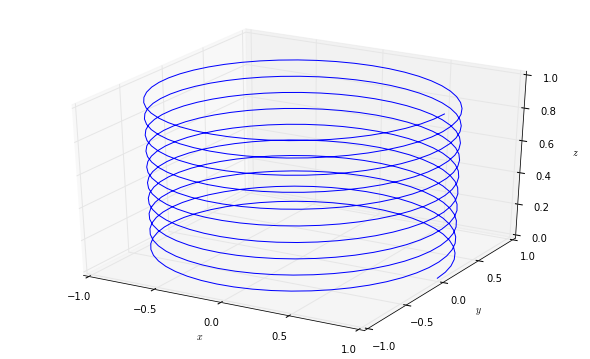

In [27]:
t = numpy.linspace(0.0, 10.0, 500)
x = numpy.cos(2.0*numpy.pi*t)
y = numpy.sin(2.0*numpy.pi*t)
z = 0.1*t

axis.plot(x, y, z)
axis.set_xlabel(r'$x$')
axis.set_ylabel(r'$y$')
axis.set_zlabel(r'$z$')
fig

If we want to plot a surface, then we need to construct *2d arrays* containing the locations of the $x$ and $y$ coordinates, and a 2d array containing the "height" of the surface. For structured data (ie, where the $x$ and $y$ coordinates lie on a regular grid) the `meshgrid` function helps. For example, the function

\begin{equation}
  \phi(x, y) = \sin^2 ( \pi x y ) \cos( 2 \pi y^2 ), \qquad x \in [0, 1], \quad y \in [0, 1],
\end{equation}

would be plotted using

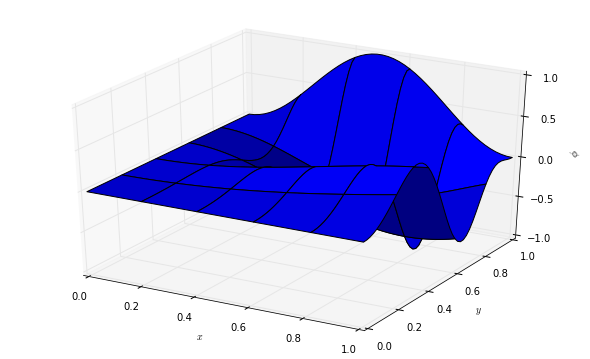

In [28]:
fig = pyplot.figure(figsize=(10, 6))
axis = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d')

x = numpy.linspace(0.0, 1.0)
y = numpy.linspace(0.0, 1.0)

X, Y = numpy.meshgrid(x, y) 
# x, y are vectors
# X, Y are 2d arrays

phi = numpy.sin(numpy.pi*X*Y)**2 * numpy.cos(2.0*numpy.pi*Y**2)

axis.plot_surface(X, Y, phi)
axis.set_xlabel(r'$x$')
axis.set_ylabel(r'$y$')
axis.set_zlabel(r'$\phi$');

There are a lot of options to modify the appearance of this plot. Important ones include the colormap (note the US spelling), which requires importing the `cm` module from `matplotlib`, and the `stride` parameters changing the appearance of the grid. For example

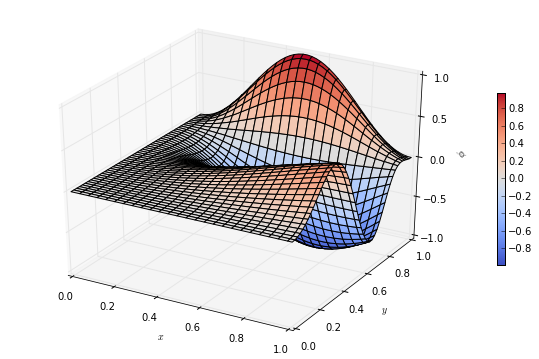

In [29]:
from matplotlib import cm

fig = pyplot.figure(figsize=(10, 6))
axis = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d')

p = axis.plot_surface(X, Y, phi, rstride=1, cstride=2, cmap = cm.coolwarm)
axis.set_xlabel(r'$x$')
axis.set_ylabel(r'$y$')
axis.set_zlabel(r'$\phi$')
fig.colorbar(p, shrink=0.5);

## Further reading

As noted earlier, the [matplotlib documentation](http://matplotlib.org/api/pyplot_summary.html) contains a lot of details, and the [gallery](http://matplotlib.org/gallery.html) contains a lot of examples that can be adapted to fit. There is also an [extremely useful document](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) as part of [Johansson's lectures on scientific python](https://github.com/jrjohansson/scientific-python-lectures).

# scipy

`scipy` is a package for scientific python, and contains many functions that are essential for mathematics. It works particularly well with `numpy`. We briefly introduced it above for tackling Linear Algebra problems, but it also includes

* Scientific constants
* Integration and ODE solvers
* Interpolation
* Optimization and root finding
* Statistical functions

and much more.

## Integration

The *numerical quadrature* problem involves solving the *definite* integral

\begin{equation}
  \int_a^b f(x) \, \text{d} x,
\end{equation}

or a suitable generalization. `scipy` has a module, `scipy.integrate`, that includes a number of functions to solve these types of problems. For example, to solve

\begin{equation}
  I = \int_0^{\pi} \sin^2(x) \, \text{d} x,
\end{equation}

the `quad` function can be used as:

In [30]:
def integrand(x):
    """
    The integrand \sin^2(x).
    
    Parameters
    ----------
    
    x : real (list)
        The point(s) at which the integrand is evaluated
        
    Returns
    -------
    
    integrand : real (list)
        The integrand evaluated at x
    """
    from numpy import sin
    
    return sin(x)**2

from scipy.integrate import quad

result = quad(integrand, 0.0, numpy.pi)
print("The result is {}.".format(result))

The result is (1.5707963267948966, 1.743934249004316e-14).


The steps we have taken are:

1. Define the integrand by defining a function. This function takes the points at which the integrand is evaluated. By using `numpy` we can do this with a single command.
2. Import the `quad` function.
3. Call the `quad` function, passing the function defining the integrand, and the lower and upper limits.

The result we get back, as seen from the screen output, is *not just* $I$. It is a tuple containing both $I$, and also the *accuracy* with which `quad` believes it has computed the result. The quadrature is a *numerical approximation*, so can never be perfect. You should check this error estimate to ensure the result is "good enough" for your purposes.

We can also pass additional parameters if needed. Consider the problem

\begin{equation}
  I_a = \int_0^{\pi} \sin^2 (a x) \, \text{d} x.
\end{equation}

If we wanted to solve this for many values of $a$, say $a = 1, 2, \dots, 5$, we could create a function taking a parameter, and then pass that parameter through:

In [31]:
def integrand_param(x, a):
    """
    The integrand \sin^2(a x).
    
    Parameters
    ----------
    
    x : real (list)
        The point(s) at which the integrand is evaluated
    a : real
        The parameter for the integrand
        
    Returns
    -------
    
    integrand : real (list)
        The integrand evaluated at x
    """
    from numpy import sin
    
    return sin(a*x)**2

from scipy.integrate import quad

for a in range(1, 6):
    result, accuracy = quad(integrand_param, 0.0, numpy.pi, args=(a,))
    print("For a={}, the result is {}.".format(a, result))

For a=1, the result is 1.57079632679.
For a=2, the result is 1.57079632679.
For a=3, the result is 1.57079632679.
For a=4, the result is 1.57079632679.
For a=5, the result is 1.57079632679.


Note that when passing the parameters using the `args` keyword argument, we put the parameters in a tuple. This shows how to pass more than one parameter: keep adding parameters to the argument list, and add them to the tuple. For example, to solve

\begin{equation}
  I_{a,b} = \int_0^{\pi} \sin^2(ax + b) \, \text{d} x
\end{equation}

we write

In [32]:
def integrand_param2(x, a, b):
    """
    The integrand \sin^2(a x + b).
    
    Parameters
    ----------
    
    x : real (list)
        The point(s) at which the integrand is evaluated
    a : real
        The parameter for the integrand
    b : real
        The second parameter for the integrand
        
    Returns
    -------
    
    integrand : real (list)
        The integrand evaluated at x
    """
    from numpy import sin
    
    return sin(a*x+b)**2

from scipy.integrate import quad

for a in range(1, 3):
    for b in range(3):
        result, accuracy = quad(integrand_param2, 0.0, numpy.pi, args=(a, b))
        print("For a={}, b={}, the result is {}.".format(a, b, result))

For a=1, b=0, the result is 1.57079632679.
For a=1, b=1, the result is 1.57079632679.
For a=1, b=2, the result is 1.57079632679.
For a=2, b=0, the result is 1.57079632679.
For a=2, b=1, the result is 1.57079632679.
For a=2, b=2, the result is 1.57079632679.


## Solving ODEs

There is a link between the solution of integrals and the solution of differential equations. Unfortunately, the numerical solution of an ODE is more complex than the solution of an integral. Fortunately, `scipy` contains a number of methods for these as well.

The methods in `scipy` solve ODEs of the form
\begin{equation}
  \frac{\text{d} \vec{y}}{\text{d} t} = \vec{f} \left( \vec{y}, t \right), \qquad \vec{y}(0) = \vec{y}_0.
\end{equation}
For example, the ODE
\begin{equation}
  \frac{\text{d} y}{\text{d} t} = e^{-t} - y^2, \qquad y(0) = 1
\end{equation}
has $f(y, t) = e^{-t} - y^2$.

The method for using `scipy` is similar to the integration case.

1. Define a function that specifies the system, by defining the RHS.
2. Import the function that solves ODEs (`odeint`)
3. Call the function, passing the RHS function, the initial data $\vec{y}_0$, the times at which the solution is needed, and any parameters.

To solve our example, we use:

In [33]:
def dydt(y, t):
    """
    Defining the ODE dy/dt = e^{-t} - y^2.
    
    Parameters
    ----------
    
    y : real
        The value of y at time t (the current numerical approximation)
    t : real
        The current time t
        
    Returns
    -------
    
    dydt : real
        The RHS function defining the ODE.
    """
    
    from numpy import exp
    
    return exp(-t) - y**2

from scipy.integrate import odeint

t = numpy.linspace(0.0, 1.0)
y0 = [1.0]

y = odeint(dydt, y0, t)
print("The shape of the result is {}.".format(y.shape))
print("The value of y at t=1 is {}.".format(y[-1,0]))

The shape of the result is (50, 1).
The value of y at t=1 is 0.7921568246.


Note that the result for $y$ is not a vector, but a two dimensional array. This is because `scipy` will solve a general *system* of ODEs. This scalar case is a system of size $1$, but it still returns an array. To solve a system, the RHS function must take a vector for `y`, return a vector for `dydt`, and the initial data `y0` must be a vector. All these vectors must be the same size.

The output is the numerical approximation to $y$ at the input times $t$, and can be immediately plotted:

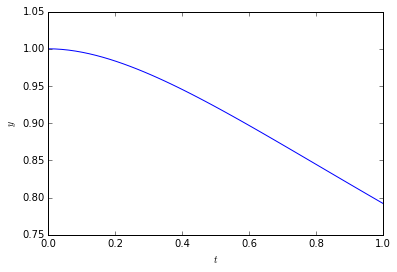

In [34]:
pyplot.plot(t, y[:,0])
pyplot.xlabel(r'$t$')
pyplot.ylabel(r'$y$')
pyplot.show()

Passing parameters is also similar to the integration case. For example, consider the problem

\begin{equation}
  \frac{\text{d}}{\text{d} t} \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} -y + \alpha \\ x \end{pmatrix}, \qquad \begin{pmatrix} x \\ y \end{pmatrix}(0) = \begin{pmatrix} 1 \\ 0 \end{pmatrix}.
\end{equation}

If $\alpha$ is zero, the solution is a circle in the $x, y$ plane. We solve this using `odeint`, denoting the state vector $\vec{z} = (x, y)^T$:

In [35]:
def dzdt(z, t, alpha):
    """
    Defining the ODE dz/dt.
    
    Parameters
    ----------
    
    z : real, list
        The value of z at time t (the current numerical approximation)
    t : real
        The current time t
    alpha : real
        Parameter
        
    Returns
    -------
    
    dzdt : real
        The RHS function defining the ODE.
    """
    
    import numpy
    
    dzdt = numpy.zeros_like(z)
    x, y = z
    dzdt[0] = -y + alpha
    dzdt[1] = x
    
    return dzdt

from scipy.integrate import odeint

t = numpy.linspace(0.0, 50.0, 1000)
z0 = [1.0, 0.0]
alpha = 1e-5

z = odeint(dzdt, z0, t, args=(alpha,))

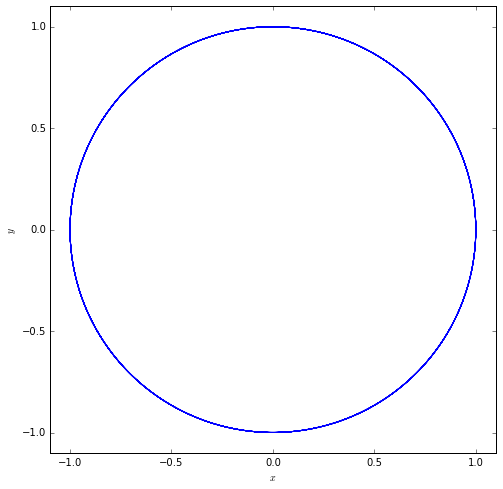

In [36]:
fig = pyplot.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.plot(z[:,0], z[:,1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1);

## Further reading

Earlier we introduced `scipy` for Linear Algebra, and gave links there. Most of those links cover the full `scipy` package. The [scipy documentation](http://docs.scipy.org/doc/scipy/reference/) is comprehensive. Johansson [also has a tutorial on scipy](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-3-Scipy.ipynb).

# Exercise: Lorenz attractor

The Lorenz system is a set of ordinary differential equations which can be written

\begin{equation}
  \frac{\text{d} \vec{v}}{\text{d} \vec{t}} = \vec{f}(\vec{v})
\end{equation}

where the variables in the state vector $\vec{v}$ are

\begin{equation}
  \vec{v} = \begin{pmatrix} x(t) \\ y(t) \\ z(t) \end{pmatrix}
\end{equation}

and the function defining the ODE is

\begin{equation}
  \vec{f} = \begin{pmatrix} \sigma \left( y(t) - x(t) \right) \\ x(t) \left( \rho - z(t) \right) - y(t) \\ x(t) y(t) - \beta z(t) \end{pmatrix}.
\end{equation}

The parameters $\sigma, \rho, \beta$ are all real numbers.

## Exercise 1

Write a function `dvdt(v, t, params)` that returns $\vec{f}$ given $\vec{v}, t$ and the parameters $\sigma, \rho, \beta$.

## Exercise 2

Fix $\sigma=10, \beta=8/3$. Set initial data to be $\vec{v}(0) = \vec{1}$. Using `scipy`, specifically the `odeint` function of `scipy.integrate`, solve the Lorenz system up to $t=100$ for $\rho=13, 14, 15$ and $28$.

Plot your results in 3d, plotting $x, y, z$.

## Exercise 3

Fix $\rho = 28$. Solve the Lorenz system twice, up to $t=40$, using the two different initial conditions $\vec{v}(0) = \vec{1}$ and $\vec{v}(0) = \vec{1} + \vec{10^{-5}}$.

Show four plots. Each plot should show the two solutions on the same axes, plotting $x, y$ and $z$. Each plot should show $10$ units of time, ie the first shows $t \in [0, 10]$, the second shows $t \in [10, 20]$, and so on.

This shows the *sensitive dependence on initial conditions* that is characteristic of chaotic behaviour.

# Exercise: The shortest published Mathematical paper

A [candidate for the shortest mathematical paper ever](http://www.ams.org/journals/bull/1966-72-06/S0002-9904-1966-11654-3/S0002-9904-1966-11654-3.pdf) shows the following result:

\begin{equation}
  27^5 + 84^5 + 110^5 + 133^5 = 144^5.
\end{equation}

This is interesting as

> This is a counterexample to a conjecture by Euler ... that at least $n$ $n$th powers are required to sum to an $n$th power, $n > 2$.

## Exercise 1

Using python, check the equation above is true.

## Exercise 2

The more interesting statement in the paper is that

\begin{equation}
  27^5 + 84^5 + 110^5 + 133^5 = 144^5.
\end{equation}

> [is] the smallest instance in which four fifth powers sum to a fifth power.

Interpreting "the smallest instance" to mean the solution where the right hand side term (the largest integer) is the smallest, we want to use python to check this statement.

We are going to need to generate all possible combinations of four integers $a, b, c, d$ and test if $a^5 + b^5 + c^5 + d^5$ matches $e^5$ where $e$ is another integer. 

The problem is the number of combinations grows very fast - the standard formula says that for a list of length $n$ there are

\begin{equation}
  \begin{pmatrix} n \\ k \end{pmatrix} = \frac{n!}{k! (n-k)!}
\end{equation}

combinations of length $k$. For $k=4$ as needed here we will have $n (n-1) (n-2) (n-3) / 24$ combinations.

Show, by getting python to compute the number of combinations $N = \begin{pmatrix} n \\ 4 \end{pmatrix}$ that $N$ grows roughly as $n^4$. To do this, plot the number of combinations and $n^4$ on a log-log scale. Restrict to $n \le 50$.

You may find the `combinations` function from the `itertools` package useful.

## Exercise 3

With 17 million combinations to work with, we'll need to be a little careful how we compute. To check the interesting statement in the paper,

1. Construct a `numpy` array containing all integers in $1, \dots, 144$ to the fifth power. 
2. Construct a list of all combinations of four elements from this array.
3. Construct a list of sums of all these combinations.
4. Loop over one list and check if the entry appears in the other list (ie, use the `in` keyword).

By printing out any entries that pass this check, you should see only the solution given in the paper.